<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_2_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.722003,98.744258,44.710572,44.400306,0.010308,251.587446,251.577806,0.009640
1,0.0,1.0,22.142942,81.485070,70.639192,20.866816,-0.001389,205.132632,205.131838,0.000794
2,0.0,2.0,48.770260,61.305759,76.059740,88.027369,-0.011244,284.151884,284.162577,-0.010693
3,0.0,3.0,79.215570,46.389349,57.282438,57.993025,0.021284,250.901666,250.877496,0.024170
4,0.0,4.0,31.435196,45.583744,63.157681,49.220901,0.017897,199.415419,199.394521,0.020898
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,40.061081,42.061232,28.760493,79.582848,-0.003116,200.462538,200.463543,-0.001005
119996,999.0,116.0,34.208001,77.645829,55.531120,34.111946,0.000076,211.496971,211.496573,0.000398
119997,999.0,117.0,71.019259,22.607967,74.702028,91.975342,0.017924,270.322520,270.299904,0.022616
119998,999.0,118.0,93.948021,60.385325,45.901420,74.561510,0.003643,284.799919,284.794611,0.005308


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.722003  98.744258  44.710572  44.400306  0.010308  251.587446   
      1.0    22.142942  81.485070  70.639192  20.866816 -0.001389  205.132632   
      2.0    48.770260  61.305759  76.059740  88.027369 -0.011244  284.151884   
      3.0    79.215570  46.389349  57.282438  57.993025  0.021284  250.901666   
      4.0    31.435196  45.583744  63.157681  49.220901  0.017897  199.415419   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  40.061081  42.061232  28.760493  79.582848 -0.003116  200.462538   
      116.0  34.208001  77.645829  55.531120  34.111946  0.000076  211.496971   
      117.0  71.019259  22.607967  74.702028  91.975342  0.017924  270.322520   
      118.0  93.948021  60.385325  45.901420  74.561510  0.003643  284.799919   
      119.0  98.180575  26.482348  50.925210  28.185879 -0.016109  213.757902   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.577806  0.009640  
      1.0    205.131838  0.000794  
      2.0    284.162577 -0.010693  
      3.0    250.877496  0.024170  
      4.0    199.394521  0.020898  
...                 ...       ...  
999.0 115.0  200.463543 -0.001005  
      116.0  211.496573  0.000398  
      117.0  270.299904  0.022616  
      118.0  284.794611  0.005308  
      119.0  213.769573 -0.011671  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.722003  98.744258  44.710572  44.400306  0.010308  251.587446   
      1.0    22.142942  81.485070  70.639192  20.866816 -0.001389  205.132632   
      2.0    48.770260  61.305759  76.059740  88.027369 -0.011244  284.151884   
      3.0    79.215570  46.389349  57.282438  57.993025  0.021284  250.901666   
      4.0    31.435196  45.583744  63.157681  49.220901  0.017897  199.415419   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  40.061081  42.061232  28.760493  79.582848 -0.003116  200.462538   
      116.0  34.208001  77.645829  55.531120  34.111946  0.000076  211.496971   
      117.0  71.019259  22.607967  74.702028  91.975342  0.017924  270.322520   
      118.0  93.948021  60.385325  45.901420  74.561510  0.003643  284.799919   
      119.0  98.180575  26.482348  50.925210  28.185879 -0.016109  213.757902   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.577806  0.009640  
      1.0    205.131838  0.000794  
      2.0    284.162577 -0.010693  
      3.0    250.877496  0.024170  
      4.0    199.394521  0.020898  
...                 ...       ...  
999.0 115.0  200.463543 -0.001005  
      116.0  211.496573  0.000398  
      117.0  270.299904  0.022616  
      118.0  284.794611  0.005308  
      119.0  213.769573 -0.011671  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.722003,98.744258,44.710572,44.400306,0.010308,251.587446,251.577806,0.009640
1,0.0,1.0,22.142942,81.485070,70.639192,20.866816,-0.001389,205.132632,205.131838,0.000794
2,0.0,2.0,48.770260,61.305759,76.059740,88.027369,-0.011244,284.151884,284.162577,-0.010693
3,0.0,3.0,79.215570,46.389349,57.282438,57.993025,0.021284,250.901666,250.877496,0.024170
4,0.0,4.0,31.435196,45.583744,63.157681,49.220901,0.017897,199.415419,199.394521,0.020898
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,40.061081,42.061232,28.760493,79.582848,-0.003116,200.462538,200.463543,-0.001005
119996,999.0,116.0,34.208001,77.645829,55.531120,34.111946,0.000076,211.496971,211.496573,0.000398
119997,999.0,117.0,71.019259,22.607967,74.702028,91.975342,0.017924,270.322520,270.299904,0.022616
119998,999.0,118.0,93.948021,60.385325,45.901420,74.561510,0.003643,284.799919,284.794611,0.005308


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.722003  98.744258  44.710572  44.400306  0.010308  251.587446   
      1.0    22.142942  81.485070  70.639192  20.866816 -0.001389  205.132632   
      2.0    48.770260  61.305759  76.059740  88.027369 -0.011244  284.151884   
      3.0    79.215570  46.389349  57.282438  57.993025  0.021284  250.901666   
      4.0    31.435196  45.583744  63.157681  49.220901  0.017897  199.415419   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  40.061081  42.061232  28.760493  79.582848 -0.003116  200.462538   
      116.0  34.208001  77.645829  55.531120  34.111946  0.000076  211.496971   
      117.0  71.019259  22.607967  74.702028  91.975342  0.017924  270.322520   
      118.0  93.948021  60.385325  45.901420  74.561510  0.003643  284.799919   
      119.0  98.180575  26.482348  50.925210  28.185879 -0.016109  213.757902   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.577806  0.009640  
      1.0    205.131838  0.000794  
      2.0    284.162577 -0.010693  
      3.0    250.877496  0.024170  
      4.0    199.394521  0.020898  
...                 ...       ...  
999.0 115.0  200.463543 -0.001005  
      116.0  211.496573  0.000398  
      117.0  270.299904  0.022616  
      118.0  284.794611  0.005308  
      119.0  213.769573 -0.011671  

[120000 rows x 8 columns]

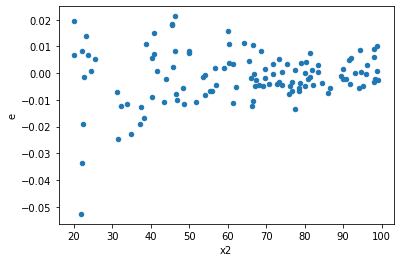

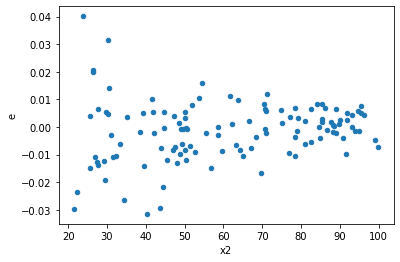

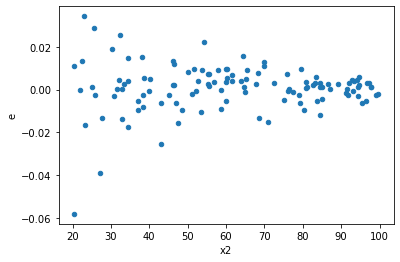

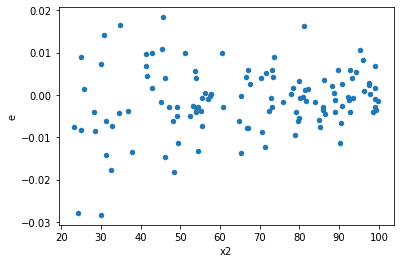

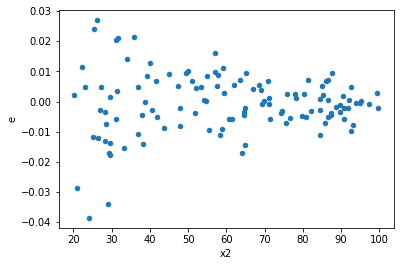

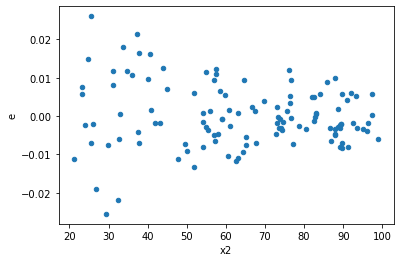

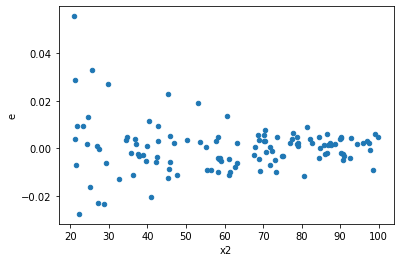

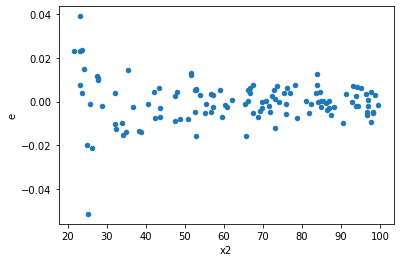

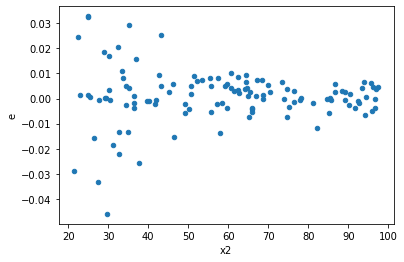

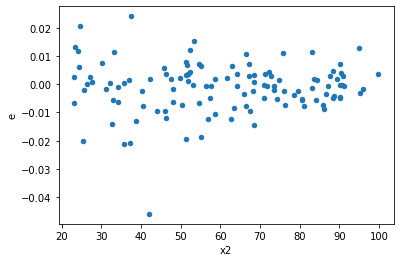

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,54.0,58.0,0.0053525851101274245,0.005962826959081192,9.91219464838412e-05,0.00010280736136346883,1.0371806144891276,0.8893588380633295,0.5553205809683353,0.44467941903166475,Reject005=1 : Homoscedasticity
1.0,58.0,54.0,0.0021608948146030443,0.010703545309384792,3.725680714832835e-05,0.0001982138020256443,5.3202036673864,4.74004058226285e-09,0.9999999976299797,2.370020291131425e-09,Reject005=0 : Heteroscedasticity
2.0,52.0,60.0,0.0034209290004479586,0.01039159243028723,6.578709616246074e-05,0.00017319320717145383,2.632631887927604,0.0003492292886941861,0.9998253853556529,0.00017461464434709306,Reject005=0 : Heteroscedasticity
3.0,44.0,68.0,0.002204705335710274,0.00402051134353848,5.010693944796078e-05,5.912516681674235e-05,1.1799796089750716,0.5320134275106385,0.7339932862446807,0.26600671375531926,Reject005=1 : Homoscedasticity
6.0,52.0,60.0,0.004793364404883716,0.006801992253083187,9.218008470930222e-05,0.00011336653755138645,1.2298376369353263,0.43759235125867413,0.7812038243706629,0.21879617562933706,Reject005=1 : Homoscedasticity
7.0,62.0,50.0,0.001811112120365265,0.008312953870699117,2.9211485812342983e-05,0.00016625907741398232,5.691565245330021,3.057036179754391e-09,0.9999999984714819,1.5285180898771955e-09,Reject005=0 : Heteroscedasticity
8.0,49.0,63.0,0.004519128129739215,0.008827376150530496,9.22271046885554e-05,0.00014011708175445232,1.5192614169946903,0.11763473981090034,0.9411826300945498,0.05881736990545017,Reject005=1 : Homoscedasticity
9.0,51.0,61.0,0.0027320958370771814,0.006586086879040877,5.35705066093565e-05,0.00010796863736132586,2.0154492498763923,0.009082769752173814,0.9954586151239131,0.004541384876086907,Reject005=0 : Heteroscedasticity
12.0,55.0,57.0,0.004246370923997105,0.005229880907899679,7.720674407267463e-05,9.175229662981893e-05,1.1883974351185254,0.5193292040376742,0.7403353979811629,0.2596646020188371,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,54.0,58.0,0.0053525851101274245,0.005962826959081192,9.91219464838412e-05,0.00010280736136346883,1.0371806144891276,0.8893588380633295,Reject005=1 : Homoscedasticity
1.0,58.0,54.0,0.0021608948146030443,0.010703545309384792,3.725680714832835e-05,0.0001982138020256443,5.3202036673864,4.74004058226285e-09,Reject005=0 : Heteroscedasticity
2.0,52.0,60.0,0.0034209290004479586,0.01039159243028723,6.578709616246074e-05,0.00017319320717145383,2.632631887927604,0.0003492292886941861,Reject005=0 : Heteroscedasticity
3.0,44.0,68.0,0.002204705335710274,0.00402051134353848,5.010693944796078e-05,5.912516681674235e-05,1.1799796089750716,0.5320134275106385,Reject005=1 : Homoscedasticity
4.0,63.0,49.0,0.0066287512624120595,0.004812760287748598,0.00010521827400654062,9.821959770915505e-05,0.9334842130469607,0.7902620495241781,Reject005=1 : Homoscedasticity
5.0,55.0,57.0,0.004076192033566064,0.0033292230759307383,7.41125824284739e-05,5.8407422384749794e-05,0.7880905032707346,0.3768704840876832,Reject005=1 : Homoscedasticity
6.0,52.0,60.0,0.004793364404883716,0.006801992253083187,9.218008470930222e-05,0.00011336653755138645,1.2298376369353263,0.43759235125867413,Reject005=1 : Homoscedasticity
7.0,62.0,50.0,0.001811112120365265,0.008312953870699117,2.9211485812342983e-05,0.00016625907741398232,5.691565245330021,3.057036179754391e-09,Reject005=0 : Heteroscedasticity
8.0,49.0,63.0,0.004519128129739215,0.008827376150530496,9.22271046885554e-05,0.00014011708175445232,1.5192614169946903,0.11763473981090034,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    567
Reject005=1 : Homoscedasticity      433
Name: Result_test, dtype: int64